In [1]:
import keras
from keras.datasets import cifar10
import pandas as pd

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

display('x_train shape:', x_train.shape)
display('y_train shape:', y_train.shape)

display('x_test shape:', x_test.shape)
display('y_test shape:', y_test.shape)

'x_train shape:'

(50000, 32, 32, 3)

'y_train shape:'

(50000, 1)

'x_test shape:'

(10000, 32, 32, 3)

'y_test shape:'

(10000, 1)

In [2]:
import matplotlib.pyplot as plt

labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# show sample images
fig, axes = plt.subplots(1, 5, figsize=(14, 14))

for i, axe in enumerate(axes):
  axe.axis('off')
  axe.imshow(x_train[i])
  axe.set_title(labels[y_train[i][0]])

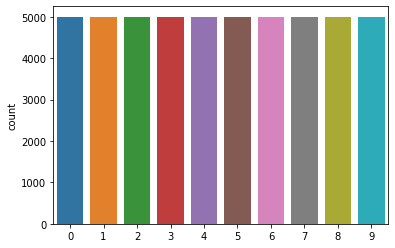

In [3]:
# show count plot of training dataset
import seaborn as sns

sns.countplot(y_train.ravel())

(50000, 32, 32)

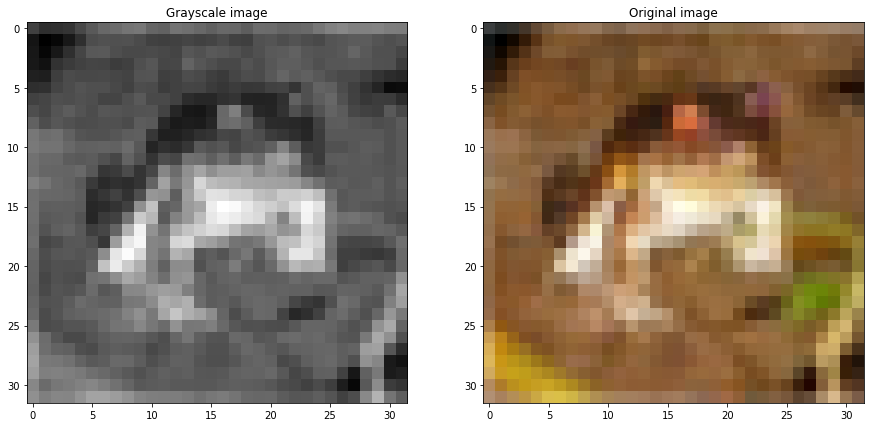

In [4]:
# convert image to greyscale to reduce dimensions
import cv2
import numpy as np

grayscale_x_train = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in x_train])
grayscale_x_test = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in x_test])
display(grayscale_x_train.shape)

# show 1 sample image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
ax1.set_title("Grayscale image")
ax2.set_title("Original image")

ax1.imshow(grayscale_x_train[0], cmap='gray')
ax2.imshow(x_train[0])


array([[ 62,  45,  47, ..., 174, 112,  90],
       [177, 135, 101, ..., 136, 137, 137],
       [255, 253, 253, ...,  84,  84,  85],
       [ 21,  30,  31, ...,  42,  51,  60],
       [184, 182, 189, ...,  79,  75,  77]], dtype=uint8)

array([[ 98,  97, 102, ...,  85,  92,  75],
       [235, 231, 232, ..., 180, 192, 198],
       [196, 193, 171, ...,   6,   4,   8],
       [154, 178, 183, ...,  59,  61,  63],
       [ 62,  75,  57, ..., 162, 170, 141]], dtype=uint8)

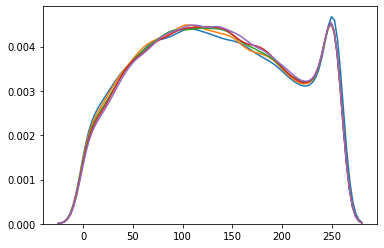

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# convert x, y to table before train
X_train = grayscale_x_train.reshape(-1, 32*32)
X_test = grayscale_x_test.reshape(-1, 32*32)

Y_train = y_train.reshape(-1)
Y_test = y_test.reshape(-1)

display(X_train[:5,:])

display(X_test[:5,:])

# visualize distribution of first 5 features before scaling
for i in range(5):
  sns.kdeplot(X_train[:,i])

array([[-0.5785124 , -0.72268908, -0.72881356, ...,  0.66666667,
        -0.07058824, -0.3255814 ],
       [ 0.37190083,  0.03361345, -0.27118644, ...,  0.21428571,
         0.22352941,  0.22093023],
       [ 1.01652893,  1.02521008,  1.01694915, ..., -0.4047619 ,
        -0.4       , -0.38372093],
       [-0.91735537, -0.8487395 , -0.86440678, ..., -0.9047619 ,
        -0.78823529, -0.6744186 ],
       [ 0.42975207,  0.42857143,  0.47457627, ..., -0.46428571,
        -0.50588235, -0.47674419]])

array([[-0.28099174, -0.28571429, -0.26271186, ..., -0.39285714,
        -0.30588235, -0.5       ],
       [ 0.85123967,  0.84033613,  0.83898305, ...,  0.73809524,
         0.87058824,  0.93023256],
       [ 0.52892562,  0.5210084 ,  0.3220339 , ..., -1.33333333,
        -1.34117647, -1.27906977],
       [ 0.18181818,  0.39495798,  0.42372881, ..., -0.70238095,
        -0.67058824, -0.63953488],
       [-0.5785124 , -0.47058824, -0.6440678 , ...,  0.52380952,
         0.61176471,  0.26744186]])

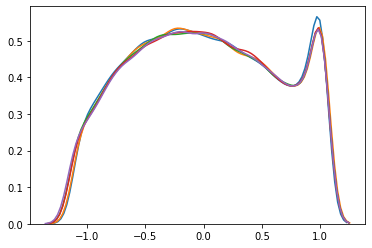

In [6]:
from sklearn.preprocessing import RobustScaler

# scale features

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

display(X_train_scaled[:5,:])

display(X_test_scaled[:5,:])

for i in range(5):
  sns.kdeplot(X_train_scaled[:,i])

In [7]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [8]:
from sklearn.metrics import accuracy_score

Y_pred = knn.predict(X_test_scaled)
accuracy_score(Y_pred, Y_test)

0.3068

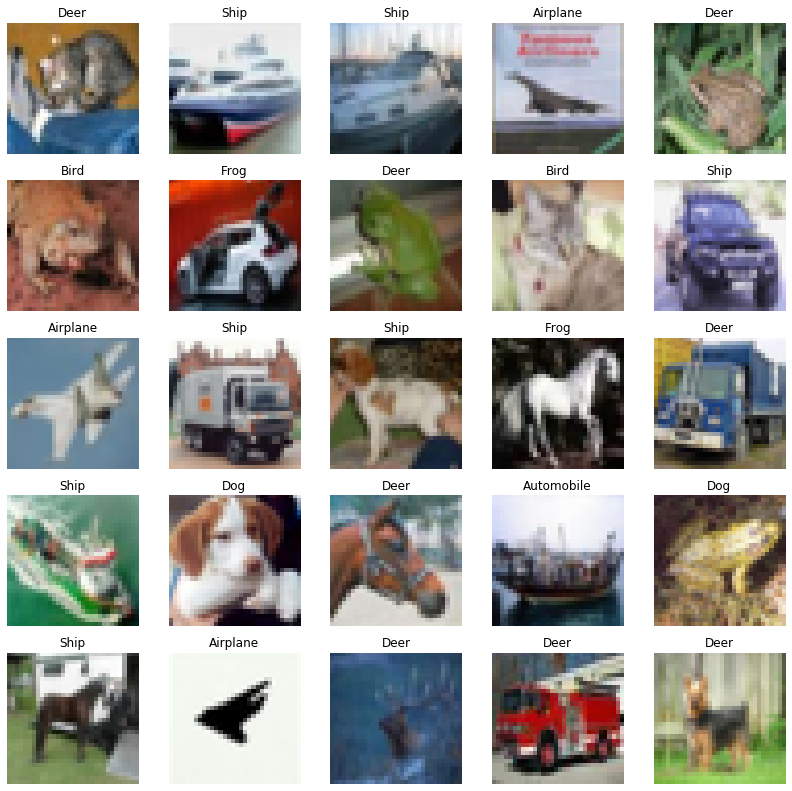

In [9]:
# show some predicted samples
fig, axes = plt.subplots(5, 5, figsize=(14, 14))

for i, axe in enumerate(axes.ravel()):
  axe.axis('off')
  axe.imshow(x_test[i])
  axe.set_title(labels[Y_pred[i]])

In [10]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn, X_train_scaled, Y_train, cv=10)

array([0.3108, 0.301 , 0.2952, 0.2938, 0.3084, 0.2996, 0.2876, 0.2968,
       0.2914, 0.3064])